

> # **🚚 Food Delivery Time Analysis 📦**

**This project analyzes delivery data to understand factors affecting delivery time. We explore ratings, order types, vehicle types, and calculate actual delivery distance using GPS coordinates. It prepares the data for future machine learning models by performing feature engineering.**

># **Goals:**
- **Understand delivery time patterns**
- **Visualize key metrics**
- **Engineer new features like distance and speed**
- **Prepare the dataset for ML modeling**




In [85]:
import pandas as pd
import numpy  as np
import seaborn as sea
import matplotlib.pyplot as plt
import math
from math import sin, cos, sqrt, atan2, radians

In [27]:
df = pd.read_excel('Food Delivery Time Prediction Case Study.xlsx')

In [28]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


**How many rows and columns are there in the dataset?**

In [29]:
df.shape

(45593, 11)

**What are the data types of each column?**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


**Are there any missing values in the dataset?**

In [31]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Type_of_order,0
Type_of_vehicle,0


In [32]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


**How many unique delivery persons are there?**

In [33]:
df.head()
df['Delivery_person_ID'].unique()

array(['INDORES13DEL02', 'BANGRES18DEL02', 'BANGRES19DEL01', ...,
       'KOCRES04DEL01', 'BHPRES06DEL03', 'GOARES03DEL03'], dtype=object)

**List all unique values in Type_of_order and Type_of_vehicle.**

In [34]:
df['Type_of_order'].unique(), df['Type_of_vehicle'].unique()

(array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object),
 array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
       dtype=object))

**What is the average age of delivery persons?**

In [42]:
df.head()
df['Delivery_person_Age'].mean()

np.float64(29.54407474831663)

**What is the average, minimum, and maximum delivery time?**

In [46]:
df.head()
df['Time_taken(min)'].mean() ,df['Time_taken(min)'].min() ,df['Time_taken(min)'].max()

(np.float64(26.29460662821047), 10, 54)

**What is the distribution of delivery person ratings?**

Text(0, 0.5, 'Frequency')

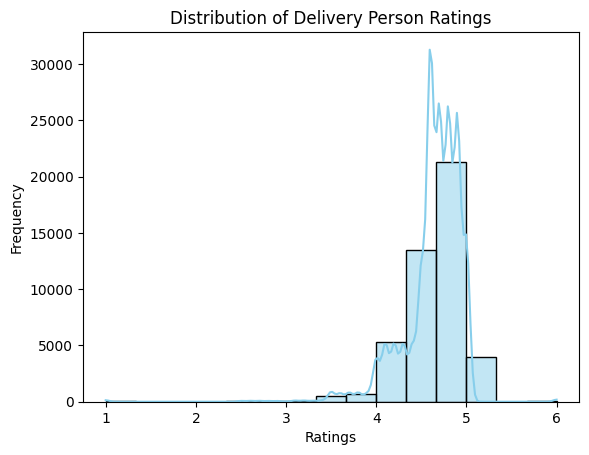

In [50]:
df.head()
sea.histplot(df['Delivery_person_Ratings'], kde=True, bins=15, color='skyblue')
plt.title("Distribution of Delivery Person Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")

**Which vehicle type is used the most and the least?**

Text(0, 0.5, 'Count')

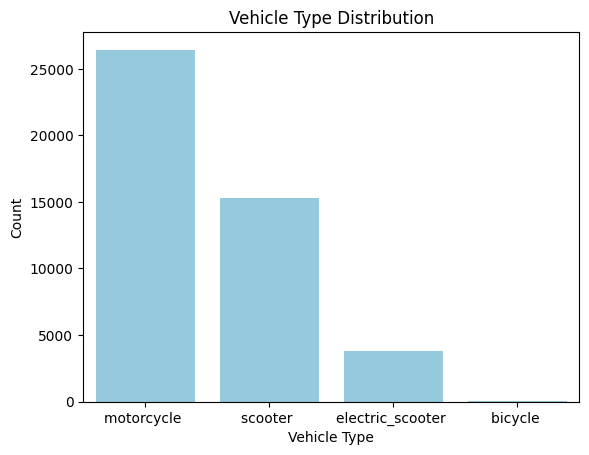

In [61]:
df.head()
v = df['Type_of_vehicle'].value_counts()
sea.barplot(v, color = 'skyblue')
plt.title("Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")

**Which order type is most frequently delivered?**

In [59]:
df.head()
order = df['Type_of_order'].value_counts()
# sea.barplot(order)
# plt.title("Order Type Distribution")
# plt.xlabel("Order Type")
order

,count
Type_of_order,
Snack,11533
Meal,11458
Drinks,11322
Buffet,11280


**Plot a histogram of Delivery_person_Age**

Text(0, 0.5, 'Frequency')

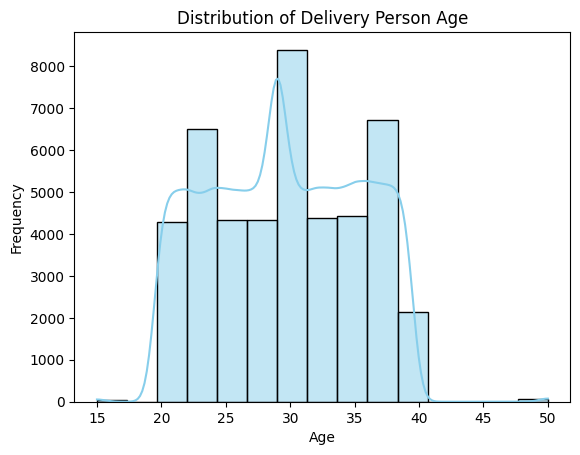

In [60]:
sea.histplot(df['Delivery_person_Age'], kde=True, bins=15, color='skyblue')
plt.title("Distribution of Delivery Person Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

**Create a boxplot of Delivery_person_Ratings**

Text(0.5, 0, 'Ratings')

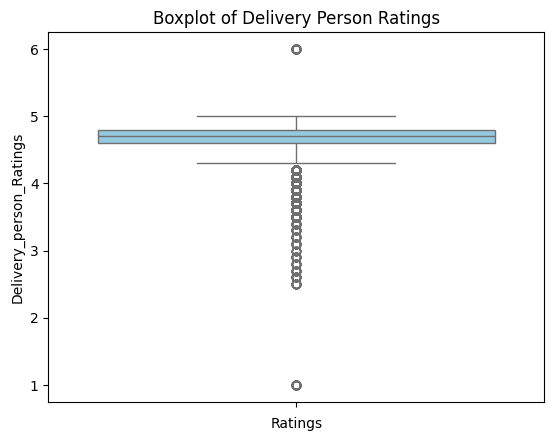

In [62]:
sea.boxplot(df['Delivery_person_Ratings'], color='skyblue',)
plt.title("Boxplot of Delivery Person Ratings")
plt.xlabel("Ratings")

**Create a countplot of Type_of_order.**

Text(0, 0.5, 'Count')

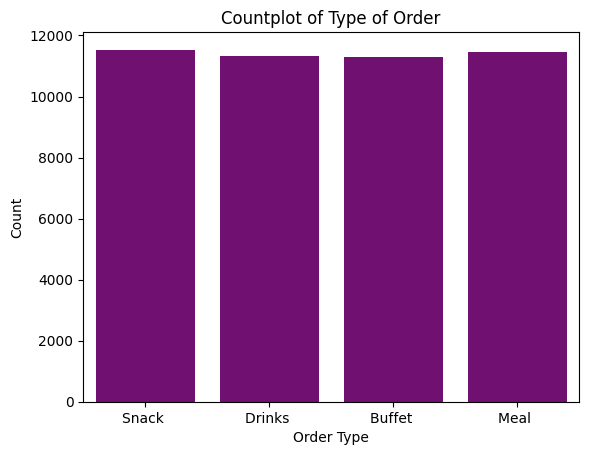

In [65]:
df.head()
sea.countplot(x='Type_of_order', data=df,color = 'purple')
plt.title("Countplot of Type of Order")
plt.xlabel("Order Type")
plt.ylabel("Count")

**Create a pie chart of vehicle usage (Type_of_vehicle)**

Text(0.5, 1.0, 'Pie Chart of Vehicle Usage')

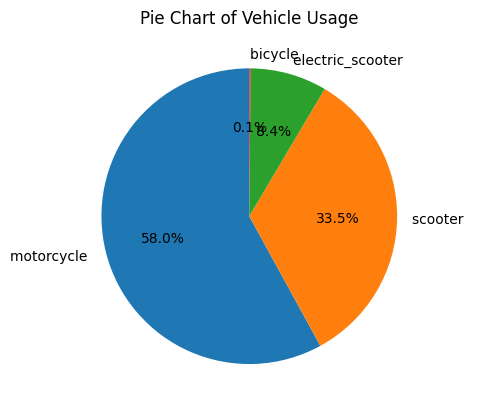

In [67]:
df.head()
plt.pie(df['Type_of_vehicle'].value_counts(), labels=df['Type_of_vehicle'].unique(), autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Vehicle Usage")
#

**Create a histogram of Time_taken(min) to check distribution.**

Text(0, 0.5, 'Frequency')

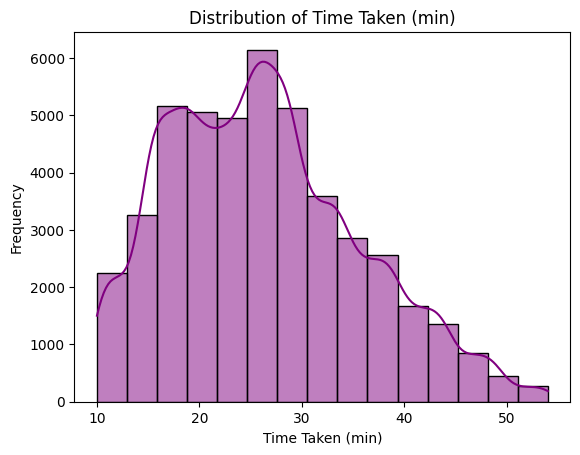

In [70]:
df.head()
sea.histplot(df['Time_taken(min)'], kde=True, bins=15, color='purple')
plt.title("Distribution of Time Taken (min)")
plt.xlabel("Time Taken (min)")
plt.ylabel("Frequency")


**Compare average delivery time by Type_of_order using a bar plot.**

Text(0, 0.5, 'Average Delivery Time (min)')

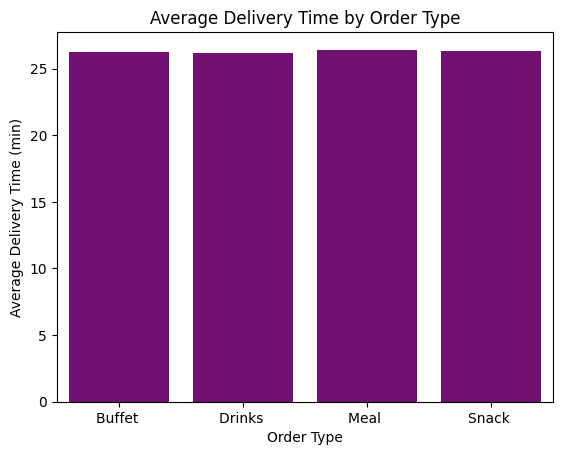

In [76]:
df.head()
time  = df.groupby('Type_of_order')['Time_taken(min)'].mean()
sea.barplot(time, color = 'purple')
plt.title("Average Delivery Time by Order Type")
plt.xlabel("Order Type")
plt.ylabel("Average Delivery Time (min)")

**Compare delivery times between vehicle types using a box plot.**

<Axes: xlabel='Type_of_vehicle', ylabel='Time_taken(min)'>

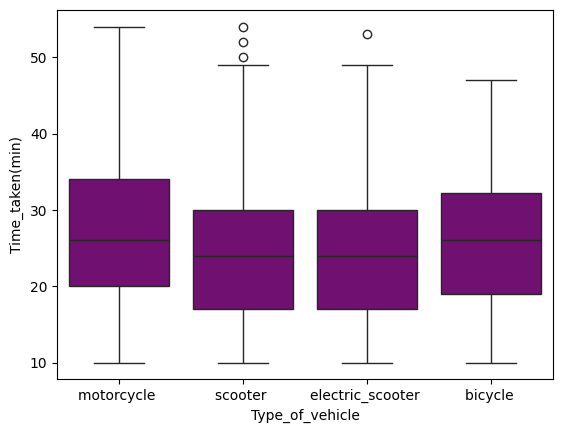

In [74]:
j = df.groupby('Type_of_vehicle')['Time_taken(min)'].mean()
sea.boxplot(x='Type_of_vehicle', y='Time_taken(min)', data=df, color='purple')


**Visualize the relationship between Delivery_person_Age and Time_taken(min) using a scatter plot.**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

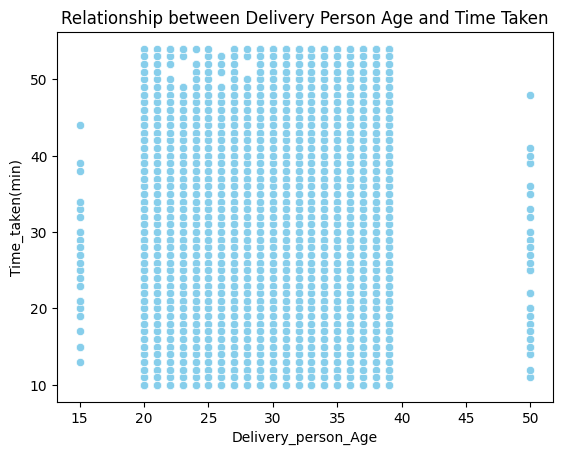

In [78]:
df.head()
sea.scatterplot(x='Delivery_person_Age', y='Time_taken(min)', data=df, color='skyblue')
plt.title("Relationship between Delivery Person Age and Time Taken")
plt

**Show the relationship between Delivery_person_Ratings and Time_taken(min) using a regression plot.**

Text(0, 0.5, 'Time Taken (min)')

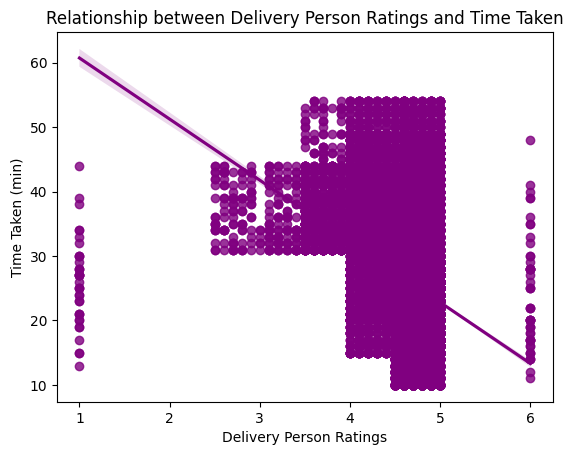

In [81]:
sea.regplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=df, color='purple')
plt.title("Relationship between Delivery Person Ratings and Time Taken")
plt.xlabel("Delivery Person Ratings")
plt.ylabel("Time Taken (min)")

**Plot average ratings by vehicle type using a bar plot.**

Text(0, 0.5, 'Average Rating')

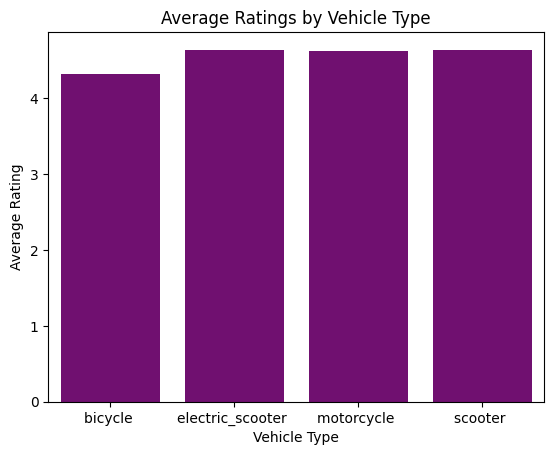

In [83]:
df.head()
r = df.groupby("Type_of_vehicle")['Delivery_person_Ratings'].mean()
sea.barplot(r, color='purple')
plt.title("Average Ratings by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Rating")

# **Feature Engineering (ML-Ready)**

**Create a new column Delivery_distance_km using latitude and longitude.**

**Use haversine formula.**

In [86]:
def haversine_distance(lat1, lon1, lat2, lon2):
  R = 6371

  lat1 = math.radians(lat1)
  lon1 = math.radians(lon1)
  lat2 = math.radians(lat2)
  lon2 = math.radians(lon2)

  dlat = lat2 - lat1
  dlon = lon2 - lon1

  # Haversine formula
  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
  c = 2 * atan2(sqrt(a), sqrt(1-a))
  distance = R * c
  return distance

In [88]:
df['Delivery_distance_km'] = df.apply(
    lambda row: haversine_distance(
        row['Restaurant_latitude'],
        row['Restaurant_longitude'],
        row['Delivery_location_latitude'],
        row['Delivery_location_longitude']
    ), axis=1
)


In [89]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Delivery_distance_km
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


## 📌 Key Insights

- Most common vehicle: Motorcycle
- Longest delivery times: Buffet orders
- Delivery distance affects time taken
- Strong correlation found between distance and time
- Ratings don't strongly affect speed
